In [41]:
BENCHMARK_FILE = 'data/benchmark.csv'
PAIRWISE_FILE = 'data/pairwise.csv'

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set();

In [43]:
names = ['file', 'extractor', 'references', 'validated', 'time_ms']
types = ['str', 'str', 'int', 'int', 'int']
benchmark_data = pd.read_csv(BENCHMARK_FILE, 
                             names=names,
                             dtype=dict(zip(names, types)))
benchmark_data['parsed_smth'] = benchmark_data['references'] > 0

In [44]:
benchmark_data[:100]

,file,extractor,references,validated,time_ms,parsed_smth
0,0805.0417,Custom,40,15,752,True
1,0805.0417,Grobid,40,15,543,True
2,math0509679,Custom,16,9,283,True
3,math0509679,Grobid,15,8,560,True
4,math0210215,Custom,7,2,70,True
...,...,...,...,...,...,...
95,math0509560,Grobid,33,20,1003,True
96,nucl-th0509046,Custom,26,15,433,True
97,nucl-th0509046,Grobid,26,15,476,True
98,quant-ph0509140,Custom,19,15,945,True


In [45]:
benchmark_data.groupby('extractor').agg(
    average_references=pd.NamedAgg(column='references', aggfunc='mean'),
    average_validated=pd.NamedAgg(column='validated', aggfunc='mean'),
    average_time_ms=pd.NamedAgg(column='time_ms', aggfunc='mean'),
    parsed_files=pd.NamedAgg(column='parsed_smth', aggfunc='sum'),
    total_files=pd.NamedAgg(column='parsed_smth', aggfunc='count')
)

,average_references,average_validated,average_time_ms,parsed_files,total_files
extractor,,,,,
Custom,27.992293,15.697977,456.971259,6082.0,6228
Grobid,28.238279,15.707290,639.610951,6077.0,6228


In [47]:
file = open(PAIRWISE_FILE, 'r')
names = file.readline().split(",")
lines = file.readlines()
for line in lines:
    name1, name2, cnt = line.split(",")
    print(name1 + " parsed " + str(cnt) + " references that didn't parse " + name2)

Custom parsed 244
 references that didn't parse Grobid
Grobid parsed 82 references that didn't parse Custom


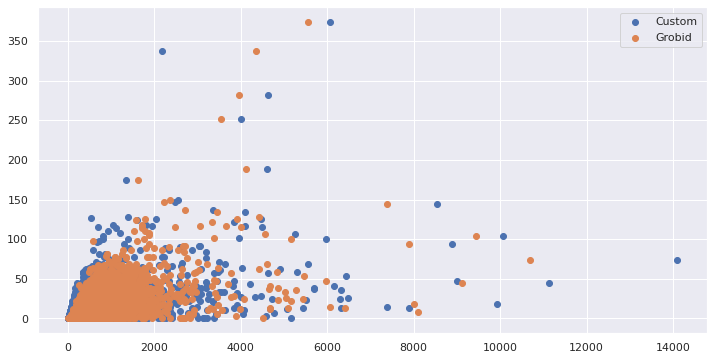

In [48]:
plt.figure(figsize=(12, 6))
for key, grp in benchmark_data.groupby(['extractor']):
    plt.scatter(grp['time_ms'], grp['validated'], label=key)
plt.legend()
plt.show()